Hola como estas

In [1]:
import pandas as pd

Isabela

In [2]:
df_coolers = pd.read_csv('coolers.csv')

In [3]:
df_warning = pd.read_csv('warnings.csv')

In [4]:
df_warning = df_warning.rename(columns={'cooler_id': 'Warning'})



In [5]:

df_limpio = df_coolers.dropna(subset=['door_opens', 'open_time'])

In [6]:

df_merged = pd.merge(df_limpio, df_warning, left_on='cooler_id', right_on='Warning', how='left')


In [7]:
df_merged = df_merged.dropna(subset=['temperature'])

In [8]:
print(df_merged.columns)

Index(['cooler_id', 'door_opens', 'open_time', 'compressor', 'power',
       'on_time', 'min_voltage', 'max_voltage', 'temperature', 'calday',
       'Warning'],
      dtype='object')


In [9]:
df_merged = df_merged.dropna(subset=['min_voltage'])

CALENDAR.CSV

In [10]:
df_calendar = pd.read_csv('calendar.csv')
df_clean_calday = df_calendar.copy()
# Convertir a datetime y luego extraer componentes calday
df_clean_calday = df_clean_calday.rename(columns={'day': 'week_day'})
df_clean_calday['calday_format'] = pd.to_datetime(df_calendar['calday'], format='%Y%m%d')
df_clean_calday['year'] = df_clean_calday['calday_format'].dt.year
df_clean_calday['month'] = df_clean_calday['calday_format'].dt.month
df_clean_calday['day'] = df_clean_calday['calday_format'].dt.day
df_clean_calmonth = df_calendar.copy()
# Convertir a datetime y luego extraer componentes de calmonth
df_clean_calmonth['calmonth'] = pd.to_datetime(df_calendar['calmonth'], format='%Y%m')
df_clean_calmonth['year'] = df_clean_calmonth['calmonth'].dt.year
df_clean_calmonth['month'] = df_clean_calmonth['calmonth'].dt.month
df_clean_calday

,calday,calmonth,week_day,calday_format,year,month,day
0,20230101,202301,Domingo,2023-01-01,2023,1,1
1,20230102,202301,Lunes,2023-01-02,2023,1,2
2,20230103,202301,Martes,2023-01-03,2023,1,3
3,20230104,202301,Miercoles,2023-01-04,2023,1,4
4,20230105,202301,Jueves,2023-01-05,2023,1,5
...,...,...,...,...,...,...,...
846,20250426,202504,Sabado,2025-04-26,2025,4,26
847,20250427,202504,Domingo,2025-04-27,2025,4,27
848,20250428,202504,Lunes,2025-04-28,2025,4,28
849,20250429,202504,Martes,2025-04-29,2025,4,29


In [11]:
# Crear columna numérica del día de la semana
df_clean_calday['week_day_num'] = df_clean_calday['calday_format'].dt.weekday

In [12]:
df_clean_calday['week_day_sin'] = np.sin(2 * np.pi * df_clean_calday['week_day_num'] / 7)
df_clean_calday['week_day_cos'] = np.cos(2 * np.pi * df_clean_calday['week_day_num'] / 7)

NameError: name 'np' is not defined

In [ ]:
df_clean_calday = df_clean_calday.drop(columns=['week_day_num'])

SALES.CSV

In [ ]:
df_sales_month = pd.read_csv('sales.csv')
df_sales_month['calmonth'] = df_sales_month['calmonth'].astype(str)
df_sales_month['year'] = df_sales_month['calmonth'].str[:4]
df_sales_month['month'] = df_sales_month['calmonth'].str[4:6]
df_sales_month = df_sales_month.drop(columns=['calmonth'])
df_sales_month

,cooler_id,customer_id,amount,year,month
0,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,76.8887,2025,03
1,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,131.0627,2024,12
2,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,180.8420,2024,07
3,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,82.3243,2025,02
4,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,201.7541,2023,10
...,...,...,...,...,...
204731,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,021ce98d216fdee3533129eb75d956978858eade78d6a4...,1244.2283,2025,04
204732,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,021ce98d216fdee3533129eb75d956978858eade78d6a4...,1829.9476,2023,06
204733,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,021ce98d216fdee3533129eb75d956978858eade78d6a4...,396.8060,2023,04
204734,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,021ce98d216fdee3533129eb75d956978858eade78d6a4...,1818.3142,2024,06


In [ ]:
# 
df_merged_calday = pd.merge(df_merged, df_clean_calday, left_on='calday', right_on='calday', how='left')

In [ ]:
# Asegúrate de que los tipos coincidan
df_merged_calday['year'] = df_merged_calday['year'].astype(int)
df_sales_month['year'] = df_sales_month['year'].astype(int)

df_merged_calday['month'] = df_merged_calday['month'].astype(int)
df_sales_month['month'] = df_sales_month['month'].astype(int)

In [ ]:
df_merge_all = pd.merge(df_merged_calday, df_sales_month, on=['cooler_id', 'year', 'month'], how='left')

In [ ]:
df_merge_all = df_merge_all.drop(columns=['calday','calmonth','calday_format'])

In [ ]:
col = 'Warning'
# Sacamos esa columna, la eliminamos y luego la agregamos al final
df_merge_all[col] = df_merge_all.pop(col)

In [ ]:
# Cuantos coolers tuvieron warnnings??
# Contar cuántos coolers únicos tuvieron al menos un warning
coolers_con_warning = df_merged[df_merged['Warning'].notna()]['cooler_id'].unique()
print(f'Número de coolers con al menos un warning: {len(coolers_con_warning)}')

Número de coolers con al menos un warning: 53


In [ ]:
# Crear una lista de cooler_id únicos que alguna vez tuvieron un warning
coolers_con_warning = df_merge_all[df_merge_all['Warning'].notnull()]['cooler_id'].unique()

# Crear nueva columna: True si ese cooler está en la lista, False si no
df_merge_all['has_warning'] = df_merge_all['cooler_id'].isin(coolers_con_warning)

In [ ]:
df_merge_all.drop(columns=['Warning'], inplace=True)

In [ ]:
df_merge_all = df_merge_all.rename(columns={'has_warning': 'Warning'})

In [ ]:
df_merge_all.columns

Index(['cooler_id', 'door_opens', 'open_time', 'compressor', 'power',
       'on_time', 'min_voltage', 'max_voltage', 'temperature', 'week_day',
       'year', 'month', 'day', 'week_day_sin', 'week_day_cos', 'customer_id',
       'amount', 'Warning'],
      dtype='object')

In [ ]:
dfwarnings = df_merge_all[df_merge_all['Warning'].notna()]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

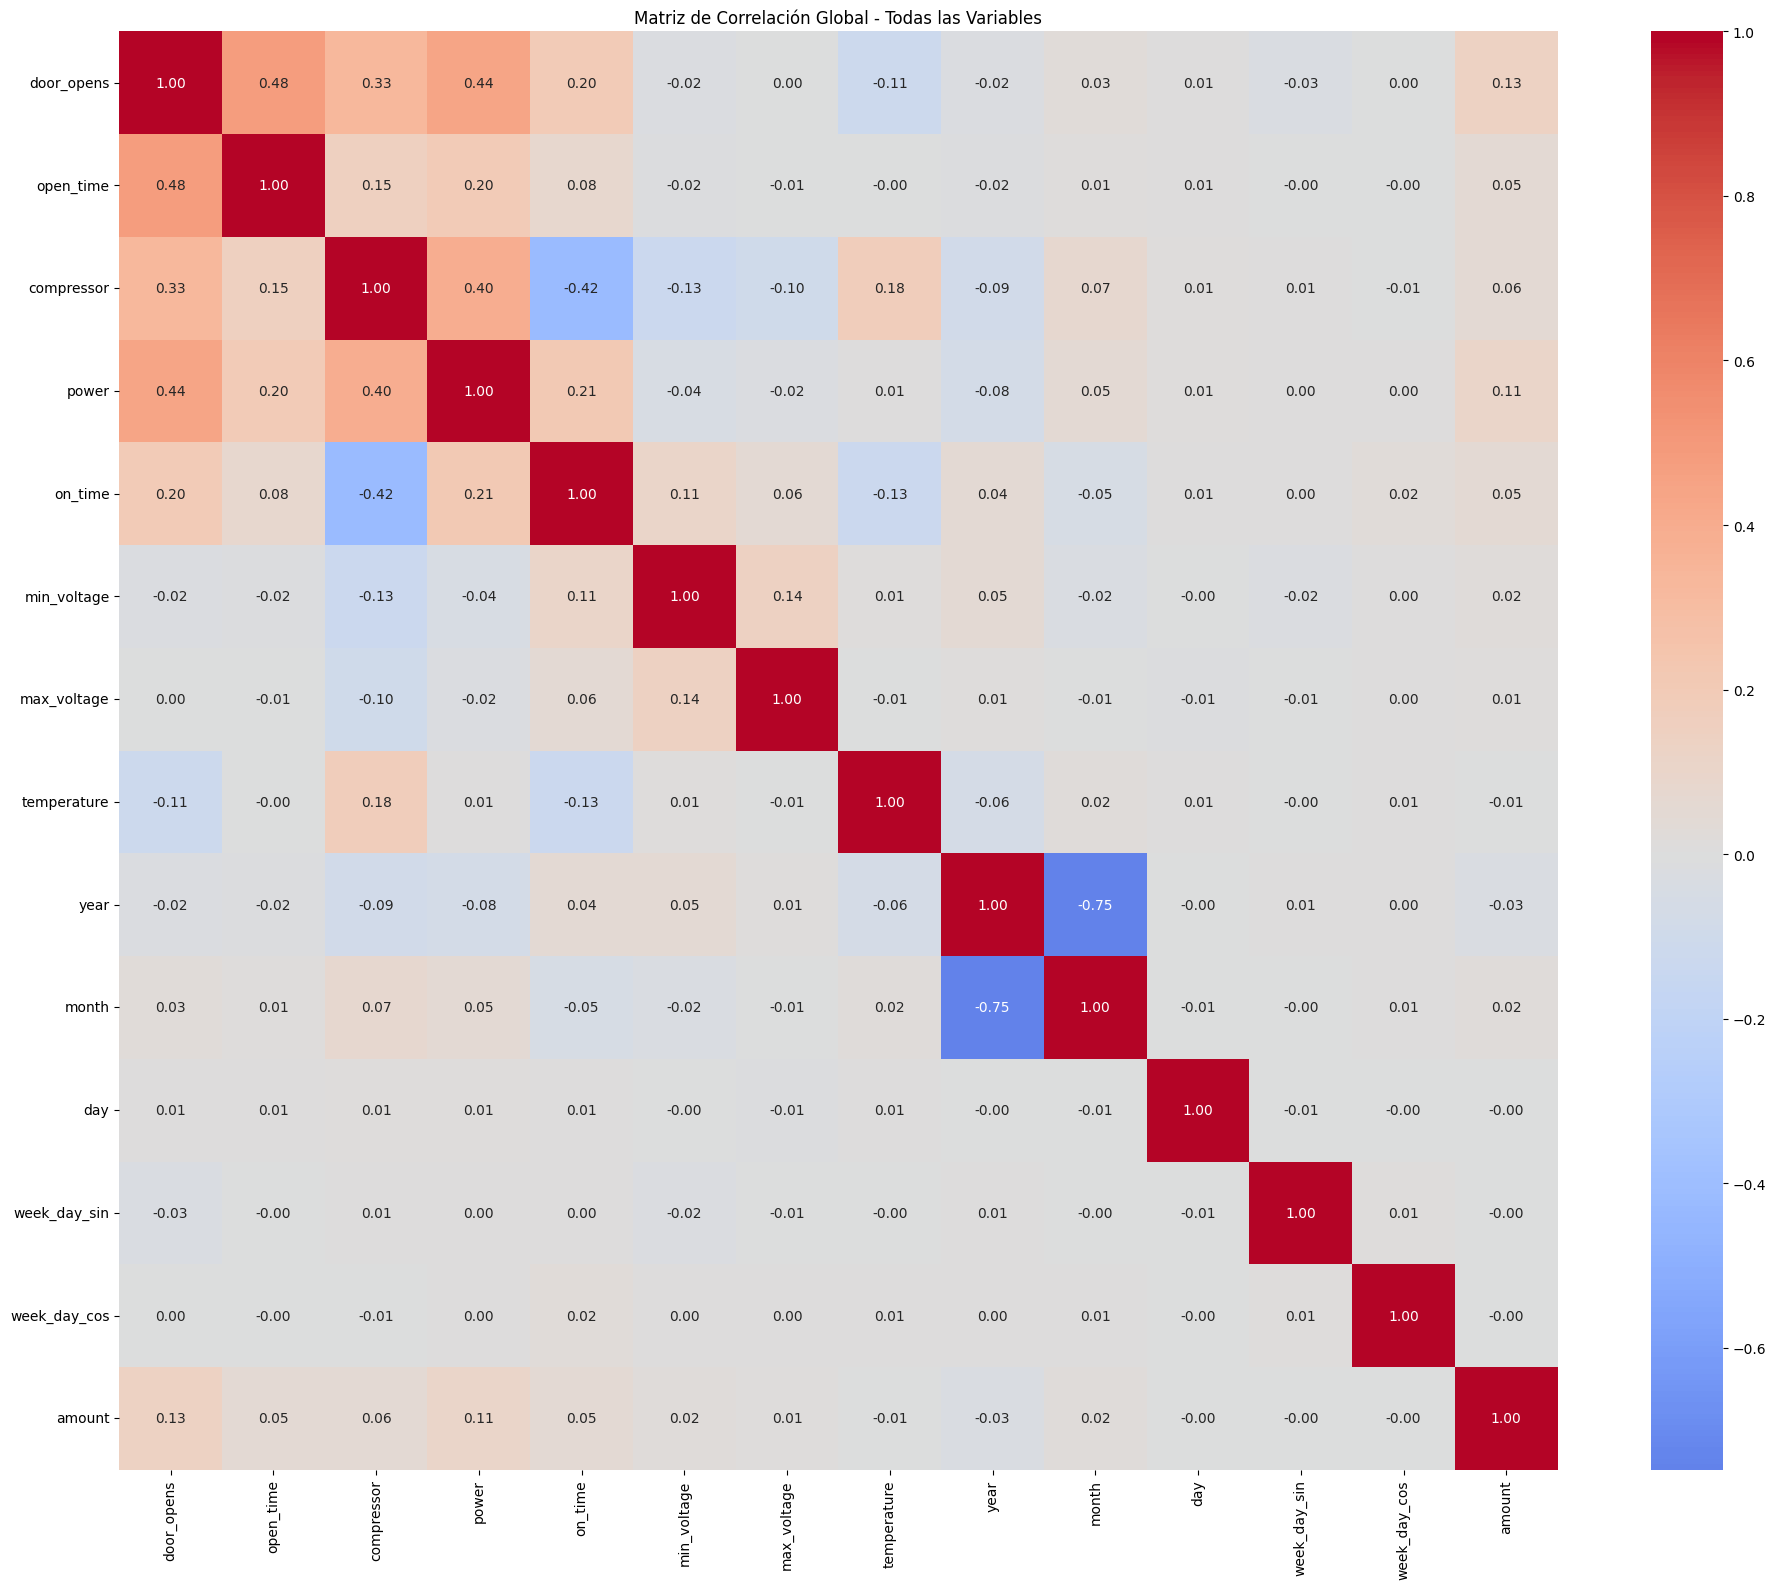

In [ ]:
# 1. Matriz de Correlación Global con todas las características
def matriz_correlacion_completa(df_merge_all):
    """
    Crea una matriz de correlación usando todas las variables numéricas del dataset
    """
    # Seleccionamos solo las columnas numéricas
    numeric_cols = df_merge_all.select_dtypes(include=[np.number]).columns
    correlation_matrix = df_merge_all[numeric_cols].corr()
    
    # Creamos una figura más grande para acomodar todas las variables
    plt.figure(figsize=(20, 16))
    sns.heatmap(correlation_matrix, 
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f',
                square=True,
                xticklabels=True,
                yticklabels=True)
    
    plt.title('Matriz de Correlación Global - Todas las Variables')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Llamas la función
matriz_correlacion_completa(df_merge_all)

In [ ]:
import pandas as pd
import numpy as np

# Seleccionar solo las columnas numéricas
numeric_cols = df_merge_all.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

# Convertir matriz a tabla con pares de variables y su correlación
corr_pairs = correlation_matrix.unstack().reset_index()
corr_pairs.columns = ['Variable_1', 'Variable_2', 'Correlation']

# Eliminar duplicados (por simetría de la matriz) y autocorrelaciones
corr_pairs = corr_pairs[corr_pairs['Variable_1'] != corr_pairs['Variable_2']]
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation'])

# Ordenar por valor absoluto de la correlación
corr_pairs['abs_corr'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.sort_values(by='abs_corr', ascending=False)

# Mostrar top 15 correlaciones más altas
corr_pairs.head(15)


,Variable_1,Variable_2,Correlation,abs_corr
121,year,month,-0.748063,0.748063
1,door_opens,open_time,0.479132,0.479132
3,door_opens,power,0.440071,0.440071
32,compressor,on_time,-0.420450,0.420450
31,compressor,power,0.396042,0.396042
2,door_opens,compressor,0.328358,0.328358
46,power,on_time,0.214484,0.214484
4,door_opens,on_time,0.200175,0.200175
17,open_time,power,0.197083,0.197083
35,compressor,temperature,0.180455,0.180455


In [81]:
# Copia base para no modificar el original
df_features_engineered = df_merge_all.copy()

# ---------- NUEVAS FEATURES ----------

# 1. Índice de actividad general (puedes ajustar los pesos si estandarizas)
df_features_engineered['activity_index'] = (
    df_features_engineered['door_opens'] * 0.4 +
    df_features_engineered['open_time'] * 0.4 +
    df_features_engineered['power'] * 0.2
)

# 2. Eficiencia del compresor
# df_features_engineered['compressor_efficiency'] = df_features_engineered['power'] / (df_features_engineered['compressor'] + 1e-5)

# 3. Rango de voltaje
df_features_engineered['voltage_range'] = df_features_engineered['max_voltage'] - df_features_engineered['min_voltage']

# 4. Promedio de voltaje
df_features_engineered['avg_voltage'] = (df_features_engineered['max_voltage'] + df_features_engineered['min_voltage']) / 2

# 5. Tiempo promedio de apertura de puertas
df_features_engineered['avg_open_time'] = df_features_engineered['open_time'] / (df_features_engineered['door_opens'] + 1e-5)

# 6. Eficiencia térmica (cuánta temperatura por uso del compresor)
# df_features_engineered['temp_efficiency'] = df_features_engineered['temperature'] / (df_features_engineered['compressor'] + 1e-5)

# ---------- OPCIONAL: Eliminar columnas originales redundantes ----------
# Estas son las columnas base que se usaron para construir las anteriores
cols_to_drop = [
    'door_opens',
    'open_time',
    'min_voltage',
    'max_voltage',
    'power'
]

df_features_engineered = df_features_engineered.drop(columns=cols_to_drop)

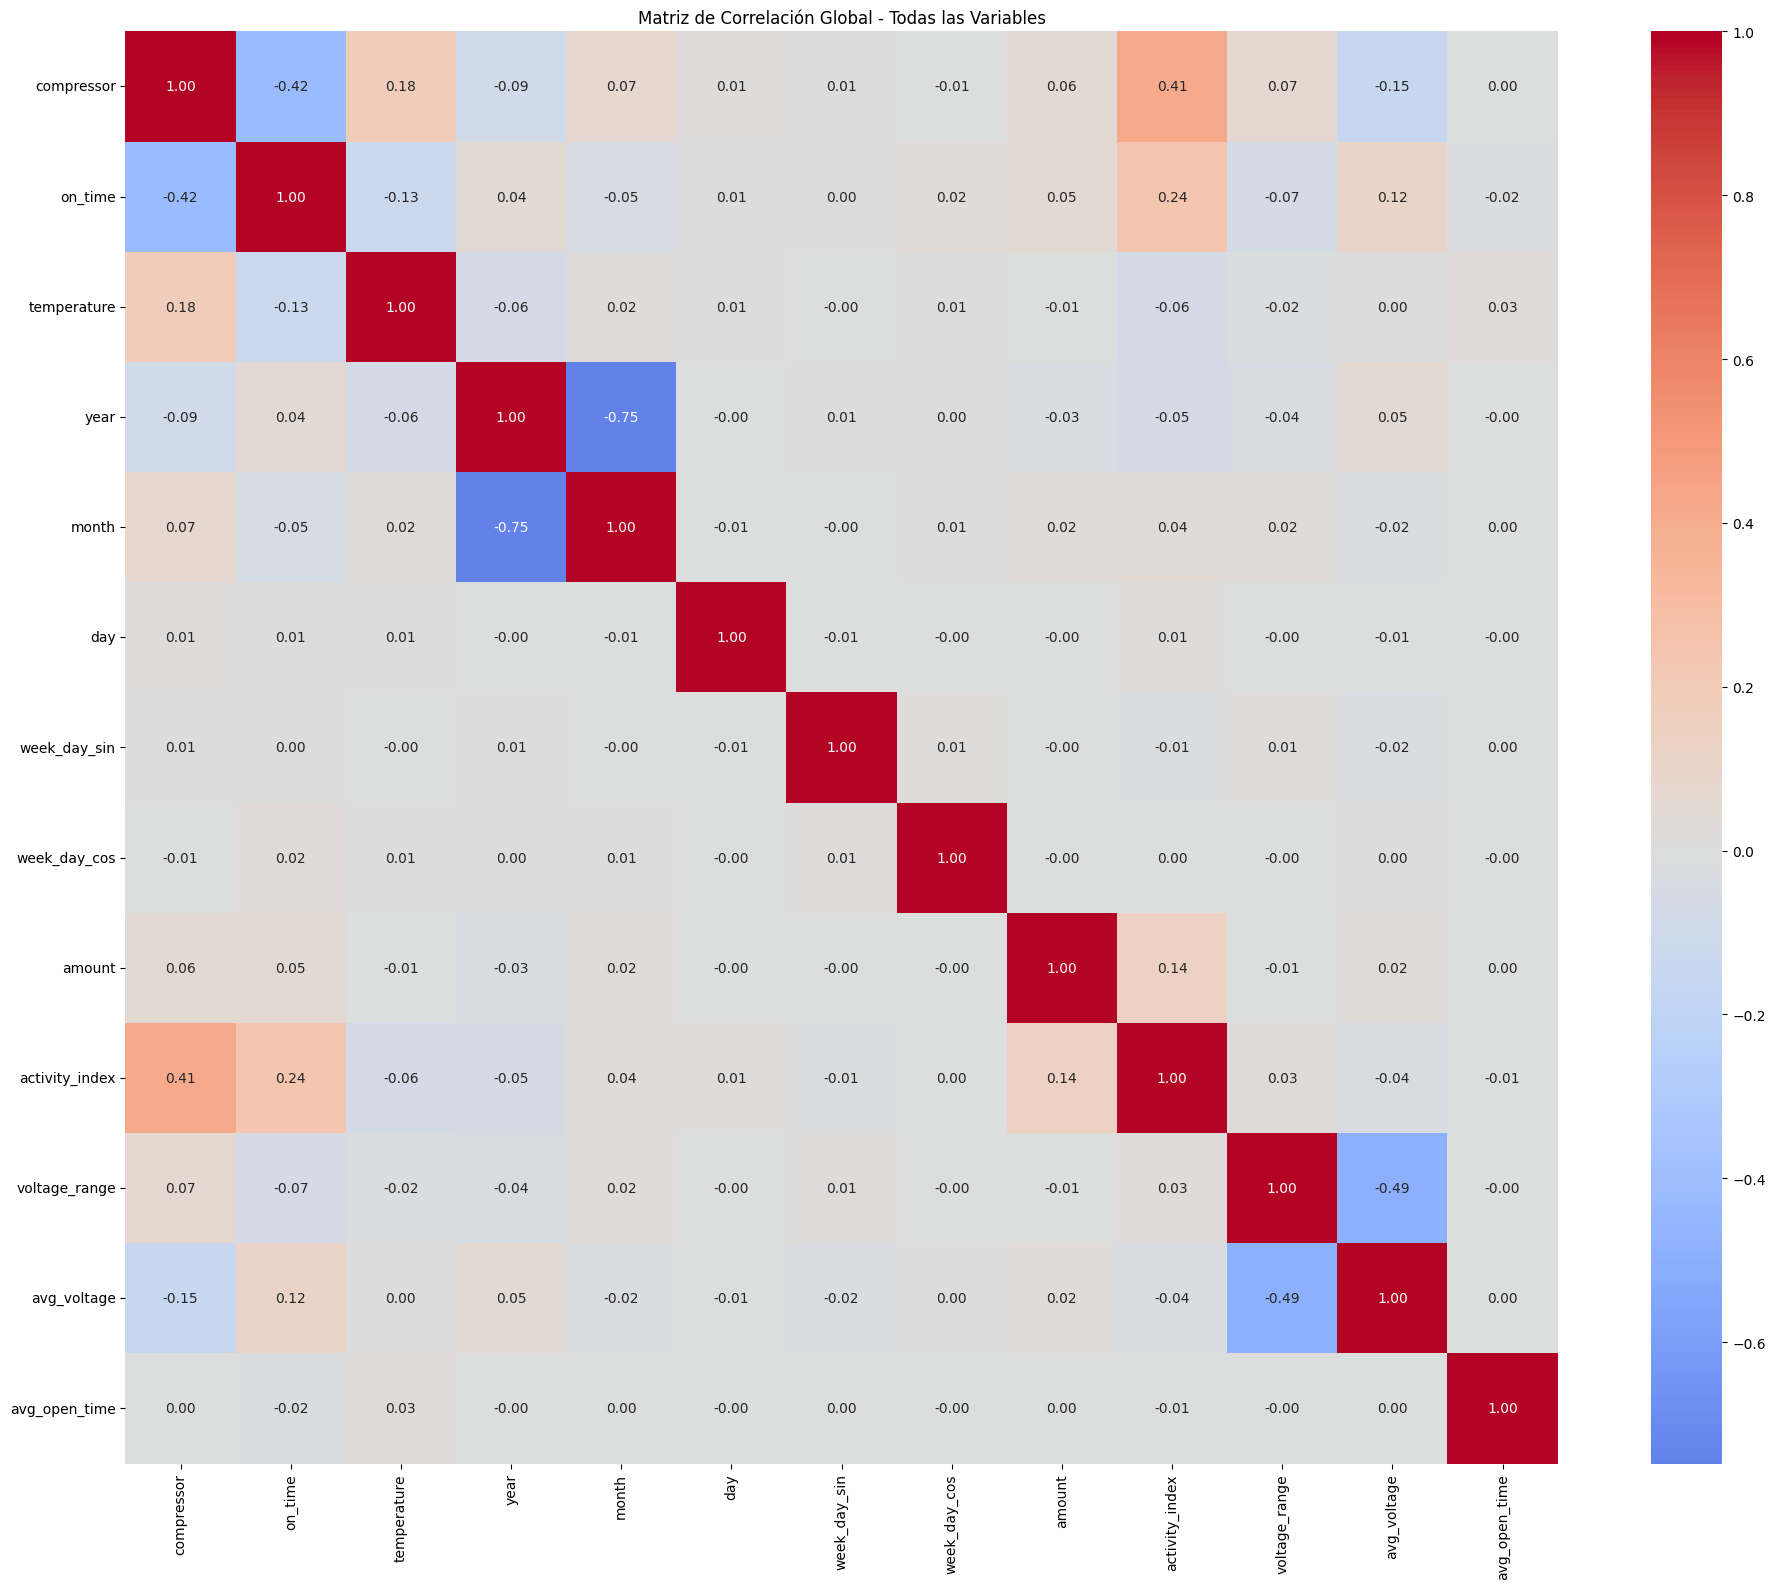

In [83]:
# Llamas la función
matriz_correlacion_completa(df_features_engineered)

In [85]:
df_features_engineered.columns

Index(['cooler_id', 'compressor', 'on_time', 'temperature', 'week_day', 'year',
       'month', 'day', 'week_day_sin', 'week_day_cos', 'customer_id', 'amount',
       'Warning', 'activity_index', 'voltage_range', 'avg_voltage',
       'avg_open_time'],
      dtype='object')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61099
           1       1.00      0.36      0.53       377

    accuracy                           1.00     61476
   macro avg       1.00      0.68      0.76     61476
weighted avg       1.00      1.00      1.00     61476



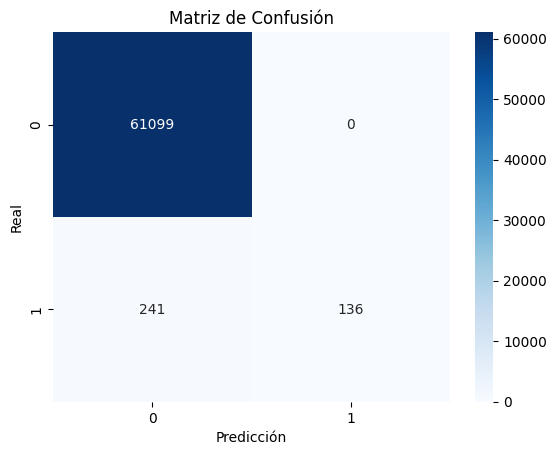

F1 promedio con validación cruzada: 0.006299227063412334


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar features y target
X = df_merge_all.drop(columns=['Warning', 'cooler_id', 'week_day', 'customer_id'])  # Elimina ID o fechas
y = df_merge_all['Warning'].astype(int)  # Aseguramos que sea 0 y 1

# Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Modelo Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')  # ideal para clases desbalanceadas
clf.fit(X_train, y_train)
# Predicciones
y_pred = clf.predict(X_test)

# Reporte
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5, scoring='f1')
print("F1 promedio con validación cruzada:", scores.mean())



Random Forest Classifier Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61118
           1       1.00      0.35      0.52       358

    accuracy                           1.00     61476
   macro avg       1.00      0.67      0.76     61476
weighted avg       1.00      1.00      1.00     61476


Confusion Matrix:
[[61118     0]
 [  233   125]]


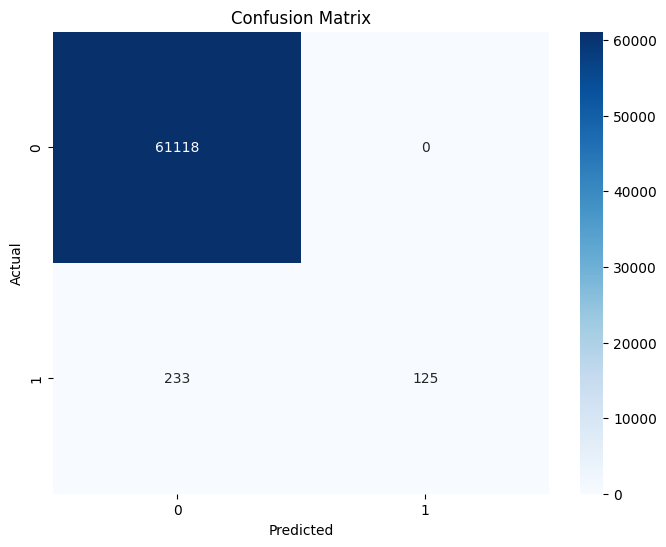

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separar features y target
X = df_merge_all.drop(columns=['Warning', 'cooler_id', 'week_day', 'customer_id'])  # Elimina ID o fechas
y = df_merge_all['Warning'].astype(int)  # Aseguramos que sea 0 y 1


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

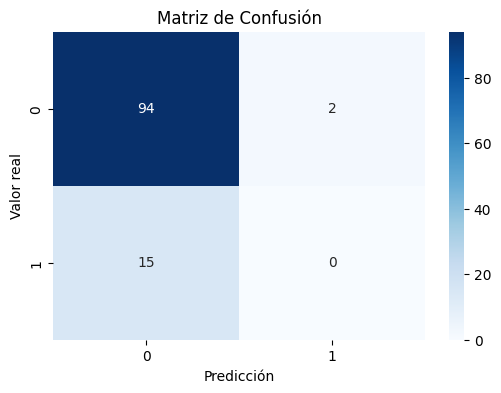

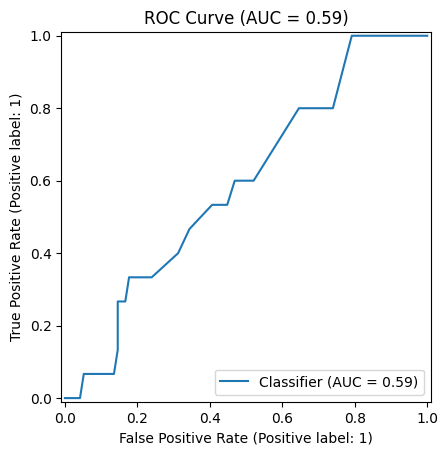

({'0': {'precision': 0.8623853211009175,
   'recall': 0.9791666666666666,
   'f1-score': 0.9170731707317074,
   'support': 96.0},
  '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 15.0},
  'accuracy': 0.8468468468468469,
  'macro avg': {'precision': 0.43119266055045874,
   'recall': 0.4895833333333333,
   'f1-score': 0.4585365853658537,
   'support': 111.0},
  'weighted avg': {'precision': 0.7458467641953881,
   'recall': 0.8468468468468469,
   'f1-score': 0.7931443638760712,
   'support': 111.0}},
 np.float64(0.5909722222222223))

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tenemos X e y preparados (df con 'Warning' como target)
# Simulamos un dataset de ejemplo representativo del usuario:
np.random.seed(42)
n_samples = 300_000
X_mock = pd.DataFrame({
    'feature1': np.random.randn(n_samples),
    'feature2': np.random.rand(n_samples) * 100,
    'feature3': np.random.normal(5, 2, n_samples)
})
# Solo 53 warnings
y_mock = pd.Series([1]*53 + [0]*(n_samples - 53), name='Warning')
X_mock['Warning'] = y_mock
df_bal = X_mock.copy()

# Separar clases
df_class_0 = df_bal[df_bal['Warning'] == 0]
df_class_1 = df_bal[df_bal['Warning'] == 1]

# Submuestreo de clase 0
df_class_0_down = resample(df_class_0,
                           replace=False,
                           n_samples=500,
                           random_state=42)

# Combinar
df_balanced = pd.concat([df_class_0_down, df_class_1])
X_balanced = df_balanced.drop('Warning', axis=1)
y_balanced = df_balanced['Warning']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Modelo
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Reporte y matriz de confusión
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC
auc_score = roc_auc_score(y_test, y_proba)

# Visualizaciones
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title(f"ROC Curve (AUC = {auc_score:.2f})")
plt.show()

report, auc_score
